In [1]:
import os
import sys
import re
import numpy as np
from numpy.ma import masked_array
import matplotlib.pyplot as plt

from osgeo import gdal
from osgeo import gdalconst
from osgeo.gdalconst import *

driver = gdal.GetDriverByName("GTiff")
driver.Register()

ruta = '/home/dramon/Analysis/percepcion_remota/AP-LIAPRE/img_modis'
patron = "^(MOD|mod).*\d+$"
directorios1n = list(filter(lambda x: re.match(patron, x) is not None, os.listdir(ruta)))

# estoy definiendo ruta a imagen

PathImag = os.path.join(ruta, directorios1n[0])

# Cargando la imagen con herramienta GDal

imag = gdal.Open(PathImag, GA_ReadOnly)

print(imag.RasterXSize, imag.RasterYSize)

print(imag.RasterCount)

imag.GetMetadata()

imag.ReadAsArray().dtype

def grafica(array):
    plt.figure(figsize=(15, 15))
    plt.imshow(array, cmap=plt.cm.gray)
    plt.colorbar()

nbands = imag.RasterCount
print(nbands)

1338 1170
1
1


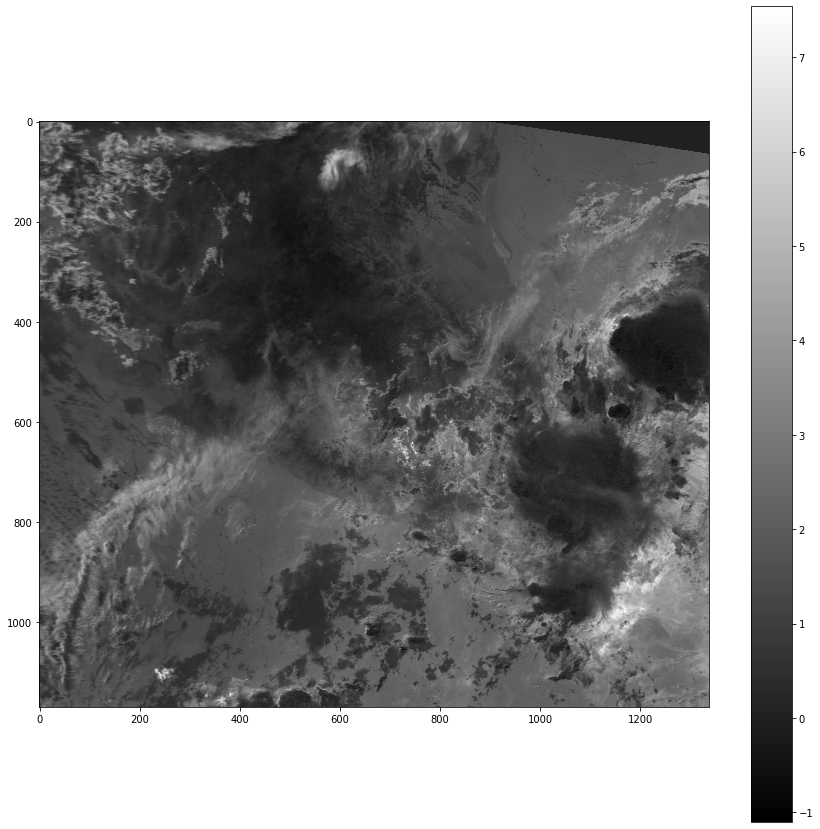

In [2]:
band = imag.GetRasterBand(1)
grafica(band.ReadAsArray())

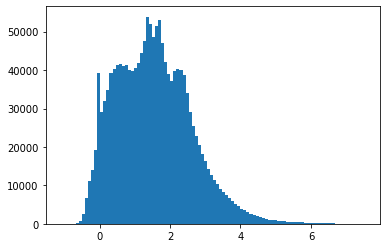

In [3]:
array = band.ReadAsArray()
_ = plt.hist(array.ravel(), bins=100)

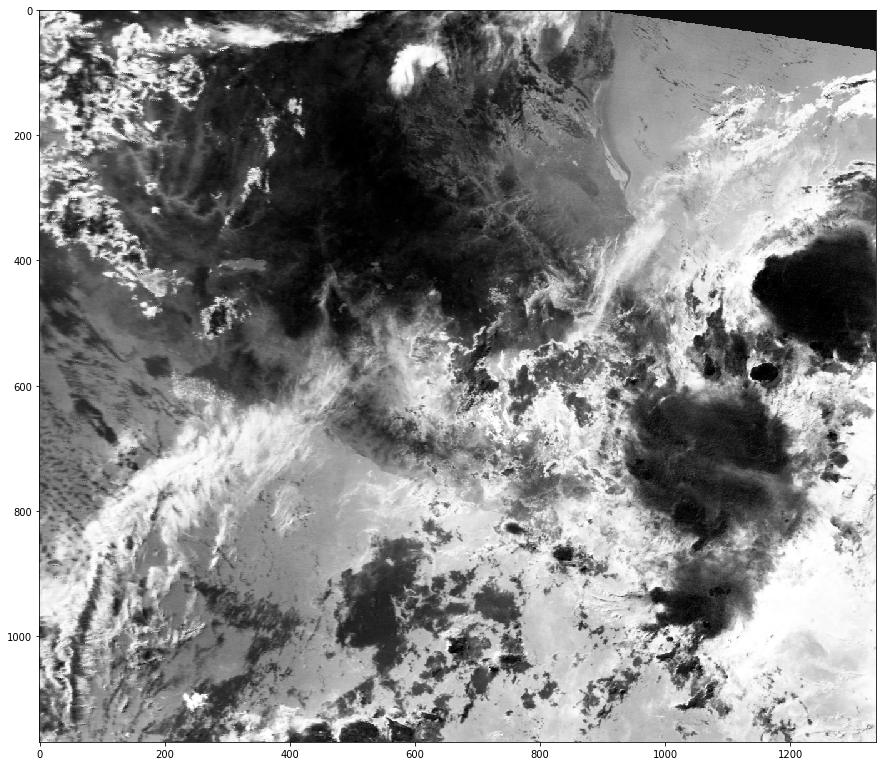

In [4]:
from skimage import exposure

img_eq = exposure.equalize_hist(array)
plt.figure(figsize=(15, 15))
plt.imshow(img_eq, cmap=plt.cm.gray)

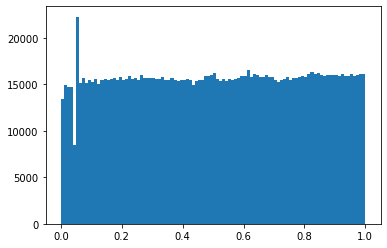

In [5]:
_ = plt.hist(img_eq.ravel(), bins=100)

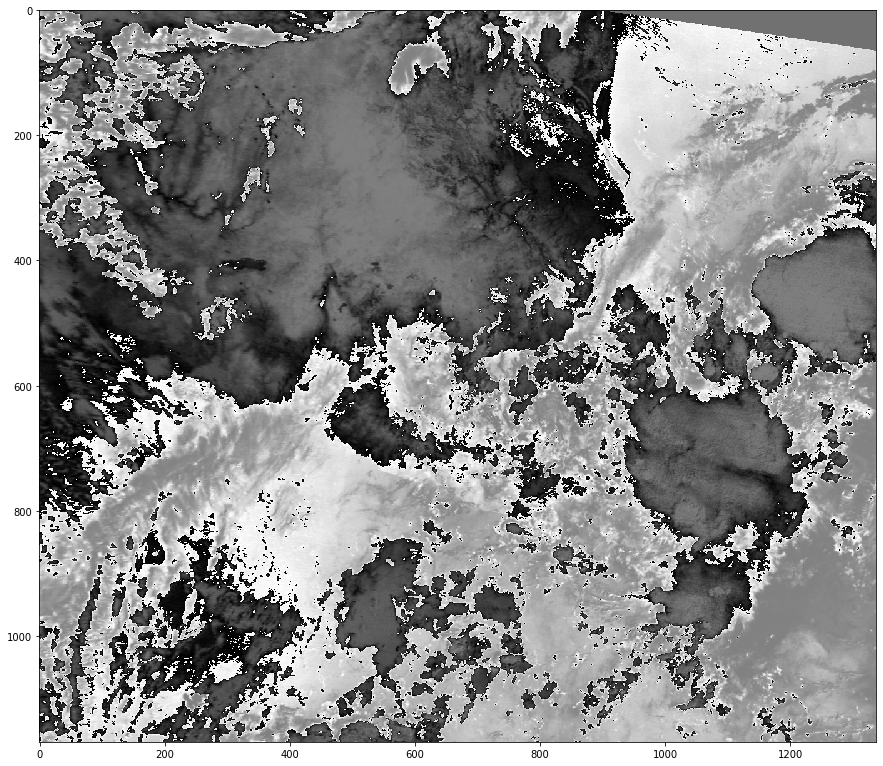

In [6]:
plt.figure(figsize=(15,15))
plt.imshow((img_eq * 255).astype(np.int8), cmap=plt.cm.gray_r)

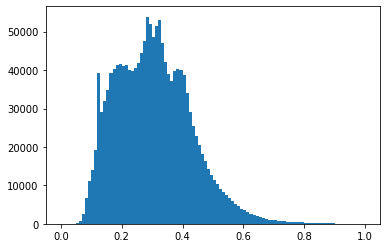

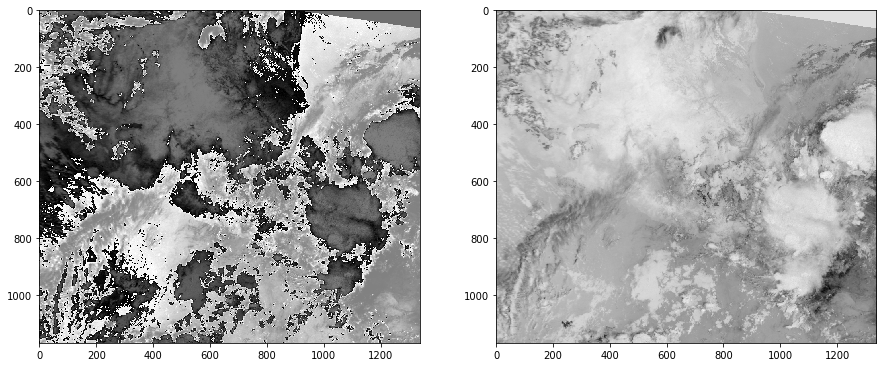

In [7]:
arrayorig = band.ReadAsArray()
arrayorig += (-arrayorig.min())
arrayorig /= arrayorig.max()
plt.figure()
_ = plt.hist(arrayorig.ravel(), bins=100)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow((img_eq * 255).astype(np.int8), cmap=plt.cm.gray_r)
plt.subplot(1,2,2)
plt.imshow((arrayorig * 255).astype(np.uint8), cmap=plt.cm.gray_r)

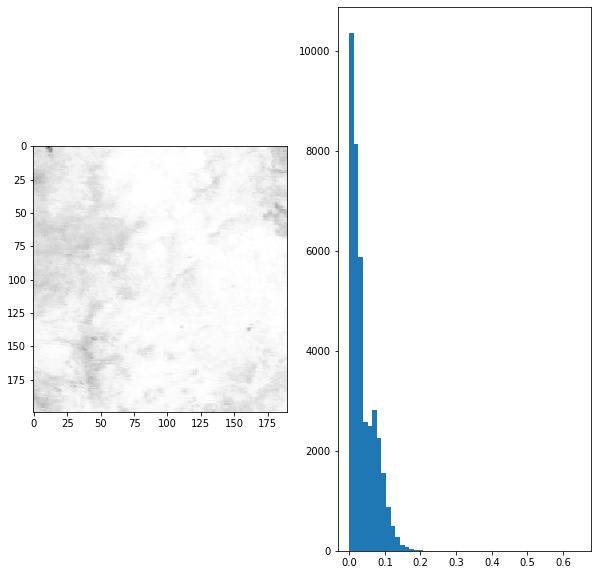

In [8]:
segmento = img_eq[200:400, 410:600]
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(segmento, cmap=plt.cm.gray_r)
plt.subplot(1,2,2)
_ = plt.hist(segmento.ravel(), bins=50)

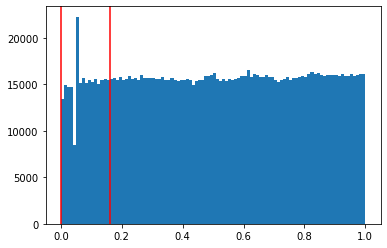

In [9]:
_ = plt.hist(img_eq.ravel(), bins=100)
umbrales = (0., 0.16)
plt.axvline(umbrales[0], color="r")
plt.axvline(umbrales[1], color="r")

In [10]:
from skimage.filters import threshold_otsu, threshold_isodata, threshold_yen

In [11]:
totsu = threshold_otsu((img_eq < 0.2) * img_eq)

In [12]:
totsu

0.06835783833268935

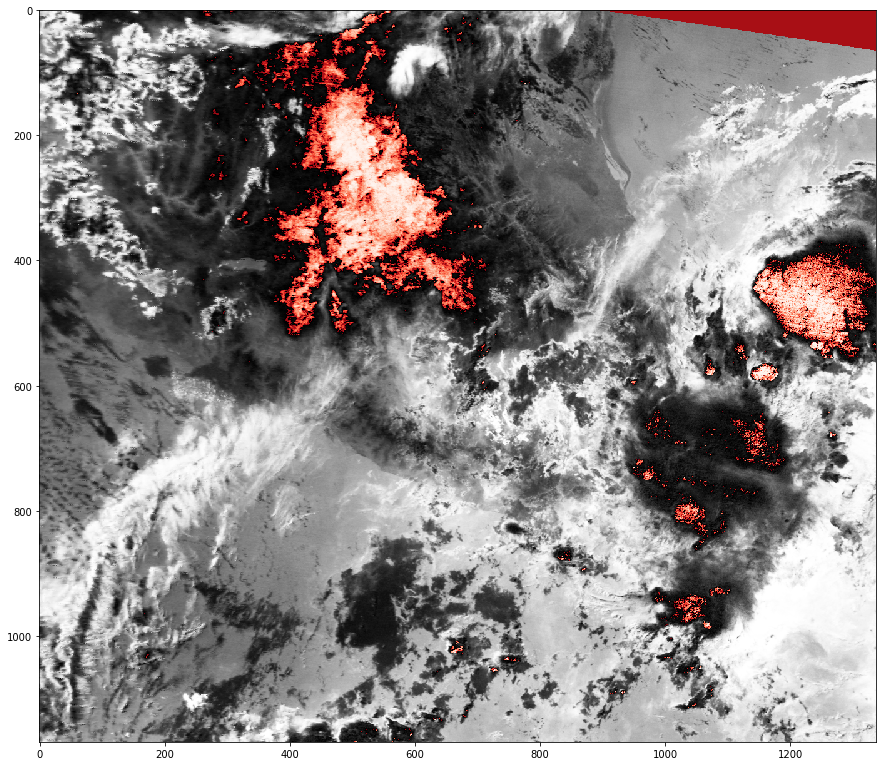

In [13]:
mask = img_eq < totsu
mask2 = img_eq > umbrales[0]
smask = np.logical_and(mask, mask2)
va = masked_array(img_eq, smask)
vb = masked_array(img_eq, np.logical_not(smask))
plt.figure(figsize=(15, 15))
plt.imshow(va, cmap='gray')
plt.imshow(vb, cmap='Reds')

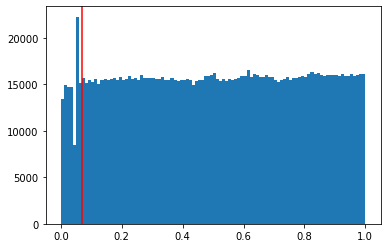

In [14]:
_ = plt.hist(img_eq.ravel(), bins=100)
plt.axvline(totsu, color="r")

In [15]:
import scipy.signal as sg

In [25]:
sx = np.array([[-1,0,1],
               [-2,0,2],
               [-1,0,1]])

In [17]:
sx.shape

(3, 3)

In [26]:
convolx = sg.convolve2d(img_eq*255, sx)

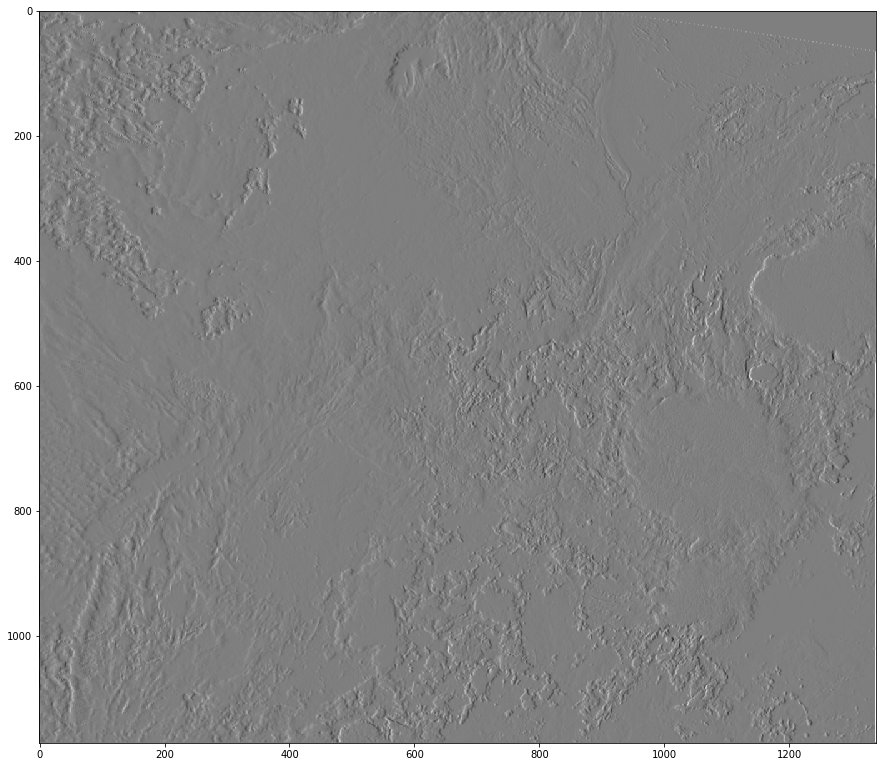

In [31]:
plt.figure(figsize=(15,15))
#plt.subplot(1,2,1)
#plt.imshow(img_eq, cmap=plt.cm.gray)
#plt.subplot(1,2,2)
plt.imshow(convolx, cmap=plt.cm.gray)

(-250, 250)

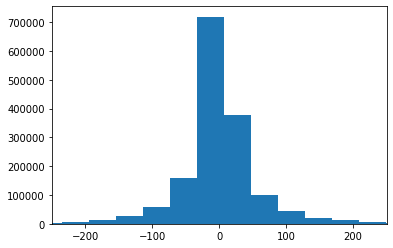

In [32]:
_ = plt.hist(convolx.ravel(), bins=50)
plt.xlim(-250, 250)

In [33]:
np.percentile(convolx.ravel, )